This python code uses keras API to predict wither an image is for a girl or a boy

I have collected the data from web and I have done some preprocessing 



# 1. Setup

In [18]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras

In [19]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

extract the images dataset

In [20]:
from zipfile import ZipFile
file_name = "Data.zip"
with ZipFile (file_name ,'r') as zip :
  zip.extractall()
  print("Done")

Done


# 2. Remove unwanted images 

In [21]:
import cv2
import imghdr

In [22]:
data_dir = 'Data' 

In [23]:

image_exts = ['jpeg','jpg', 'bmp', 'png'] # ( The acceptable types list)

In [24]:
# os.listdir() method in python --> is used to get the list of all files and directories in the specified directory.
# os.path.join() method in Python --> join one or more path components intelligently
# os.remove() --> to delete a file 

The following code cell iterates on each image path and checks wether its type exists in image_exts list or not  .


If not , the image will be removed .

In [25]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)    #cv2.imread() method loads an image from the specified file
            tip = imghdr.what(image_path)   #Determine the type of an image by imghdr.what()
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list Data/Girl/MintCookieInfoBox.png
Image not in ext list Data/Girl/800px-Tamil_girls_group.jpg
Image not in ext list Data/Girl/14-year-old-girl-600w-241799281.jpg
Image not in ext list Data/Boy/cute-kid-teen-boy-show-260nw-1509139481.jpg
Image not in ext list Data/Boy/NINTCHDBPICT000703368802.jpg


# 3. Load Data


In [26]:
# Generates a tf.data.Dataset from image files in a directory.
data = keras.utils.image_dataset_from_directory('Data',batch_size=32,image_size=(256, 256) ,shuffle=True)  

Found 251 files belonging to 2 classes.


In [27]:
data_iterator = data.as_numpy_iterator()

# Returns an iterator which converts all elements of the dataset to numpy.

Plot Samples

In [28]:
batch = data_iterator.next() # To take the first batch 

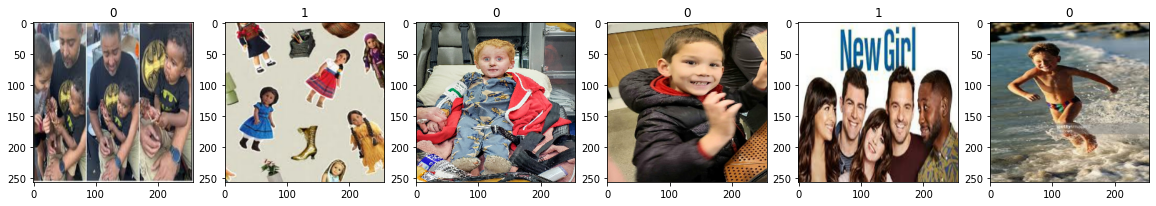

In [29]:
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [30]:
# class 1  (Girl)
# class 0  (Boy)

# 4. Data Splitting 

In [31]:
len(data)

8

In [32]:
# Determine sizes (data has 8 batches)
train_size = int(len(data)*(6/8)) # 6 batches for train 
val_size = int(len(data)*(1/8))   # 1 batches for validation 
test_size = int(len(data)*(1/8))  # 1 batches for test

In [33]:
test_size

1

In [34]:
# Batch splitting 
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [35]:
len(val)

1

# Model Building 

In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Rescaling

In [37]:
model = Sequential()

In [38]:
model.add(Rescaling(scale=1./255, offset=0.0, input_shape=(256,256,3)))

In [39]:
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [40]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [41]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)       

## Train

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='log')
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
6/6 [==============================] - 15s 654ms/step - loss: 0.8986 - accuracy: 0.4792 - val_loss: 0.6675 - val_accuracy: 0.4062
Epoch 2/30
6/6 [==============================] - 6s 626ms/step - loss: 0.7231 - accuracy: 0.4635 - val_loss: 0.6789 - val_accuracy: 0.4375
Epoch 3/30
6/6 [==============================] - 6s 620ms/step - loss: 0.6768 - accuracy: 0.4531 - val_loss: 0.6255 - val_accuracy: 0.3438
Epoch 4/30
6/6 [==============================] - 6s 616ms/step - loss: 0.6612 - accuracy: 0.4531 - val_loss: 0.5433 - val_accuracy: 0.3750
Epoch 5/30
6/6 [==============================] - 6s 619ms/step - loss: 0.6030 - accuracy: 0.4740 - val_loss: 0.5973 - val_accuracy: 0.4062
Epoch 6/30
6/6 [==============================] - 6s 621ms/step - loss: 0.5593 - accuracy: 0.5052 - val_loss: 0.4450 - val_accuracy: 0.5625
Epoch 7/30
6/6 [==============================] - 6s 618ms/step - loss: 0.4723 - accuracy: 0.4948 - val_loss: 0.4509 - val_accuracy: 0.5000
Epoch 8/30
6/6 [===

## Accuracy and Loss

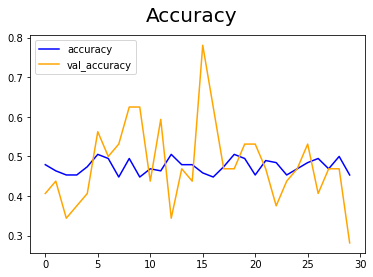

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

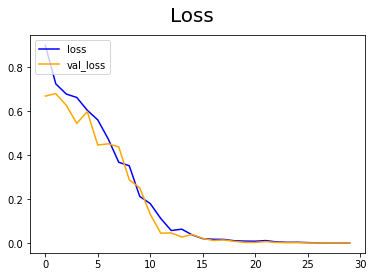

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Metrics

In [45]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [46]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [47]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    conf_matrix = tf.math.confusion_matrix(labels=y, predictions= yhat)

1/1 [==============================] - 0s 345ms/step


In [48]:
print("Precesion: ", pre.result())
print("Recall: " , re.result())
print("Accuracy: ", acc.result())
print(conf_matrix)

Precesion:  tf.Tensor(0.4074074, shape=(), dtype=float32)
Recall:  tf.Tensor(1.0, shape=(), dtype=float32)
Accuracy:  tf.Tensor(0.4074074, shape=(), dtype=float32)
tf.Tensor(
[[ 0 16]
 [ 0 11]], shape=(2, 2), dtype=int32)


The result is  not good enough due to bad data 
We can add more images to improve the accuracy and precision 


## Test 
With an Image that the model hasn't seen before

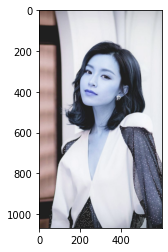

In [59]:
img = cv2.imread('/content/girl.jpeg')
plt.imshow(img)
plt.show()

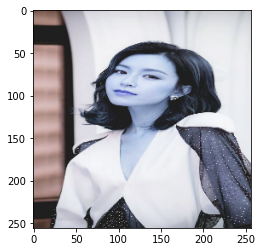

In [60]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [61]:
yhat = model.predict(np.expand_dims(resize/255, 0)) # np.expand_dims() because our model expect to receive a batch 

1/1 [==============================] - 0s 22ms/step


In [62]:
yhat

array([[1.]], dtype=float32)

In [63]:
if yhat == 1: 
    print(f'Predicted class is Girl')
else:
    print(f'Predicted class is Boy')

Predicted class is Girl


# References 

https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb